In [1]:
pip install pandas matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import os

file_path = r"C:\Users\priya\Desktop\Priya Sharma\projects\Mall_Customers.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.columns)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

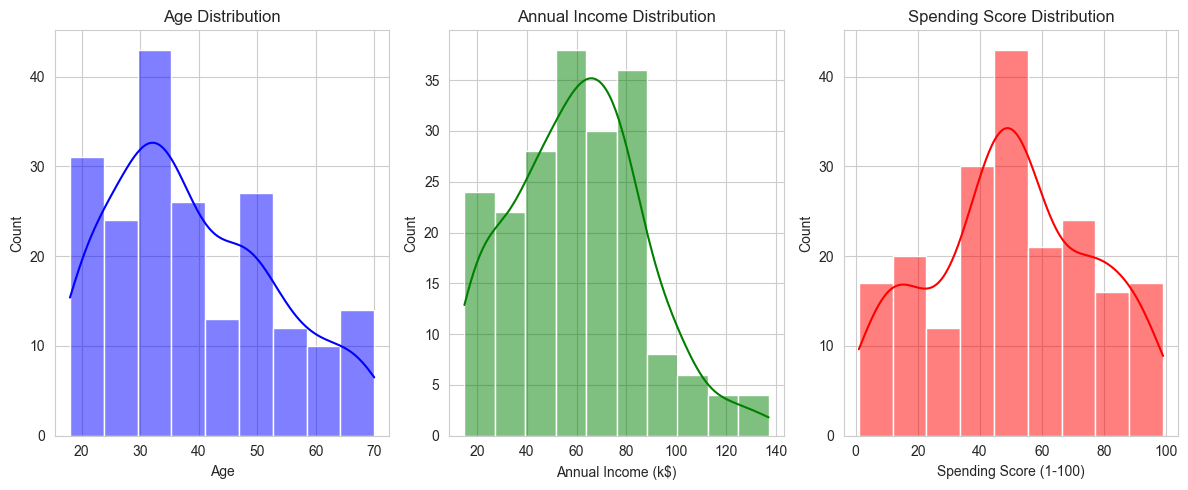

In [12]:
#histograms of Age, Annual Income, and Spending Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

In [13]:
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  
wcss = []  
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

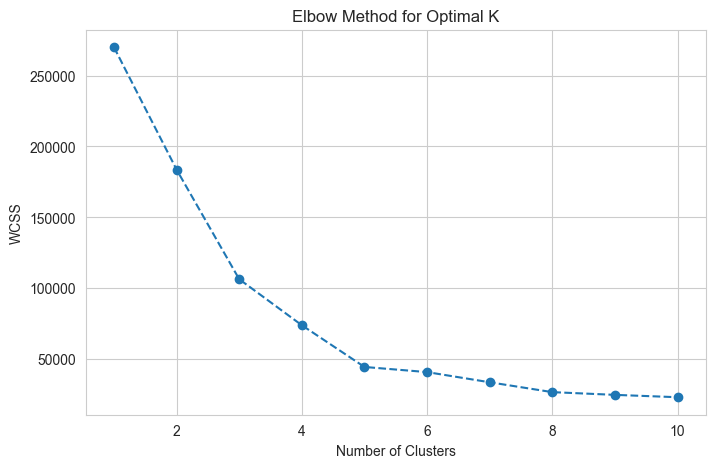

In [14]:
#Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


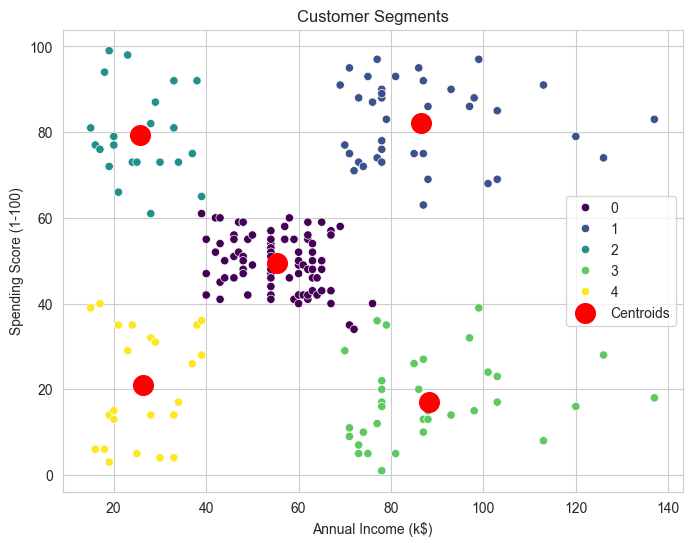

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('Customer Segments')
plt.legend()
plt.show()